In [3]:
from ibm_watson_machine_learning import APIClient

credentials = {
    "apikey":"",
    # the WML was created on london region
    "url":"https://eu-gb.ml.cloud.ibm.com"
}

wml_client = APIClient(credentials)
list = wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------------  ------------------------
ID                                    NAME          CREATED
aae29536-2d1b-46d5-8c3b-ba01545330a1  Model_deploy  2023-11-12T18:17:47.028Z
------------------------------------  ------------  ------------------------


# Getting creds
After creating a Watson Machine Learning in your resource list and a Deployement Space inside Watson Studio and setting the "Select machine learning service" on the created WML resource, you can get the apikey and url as following:
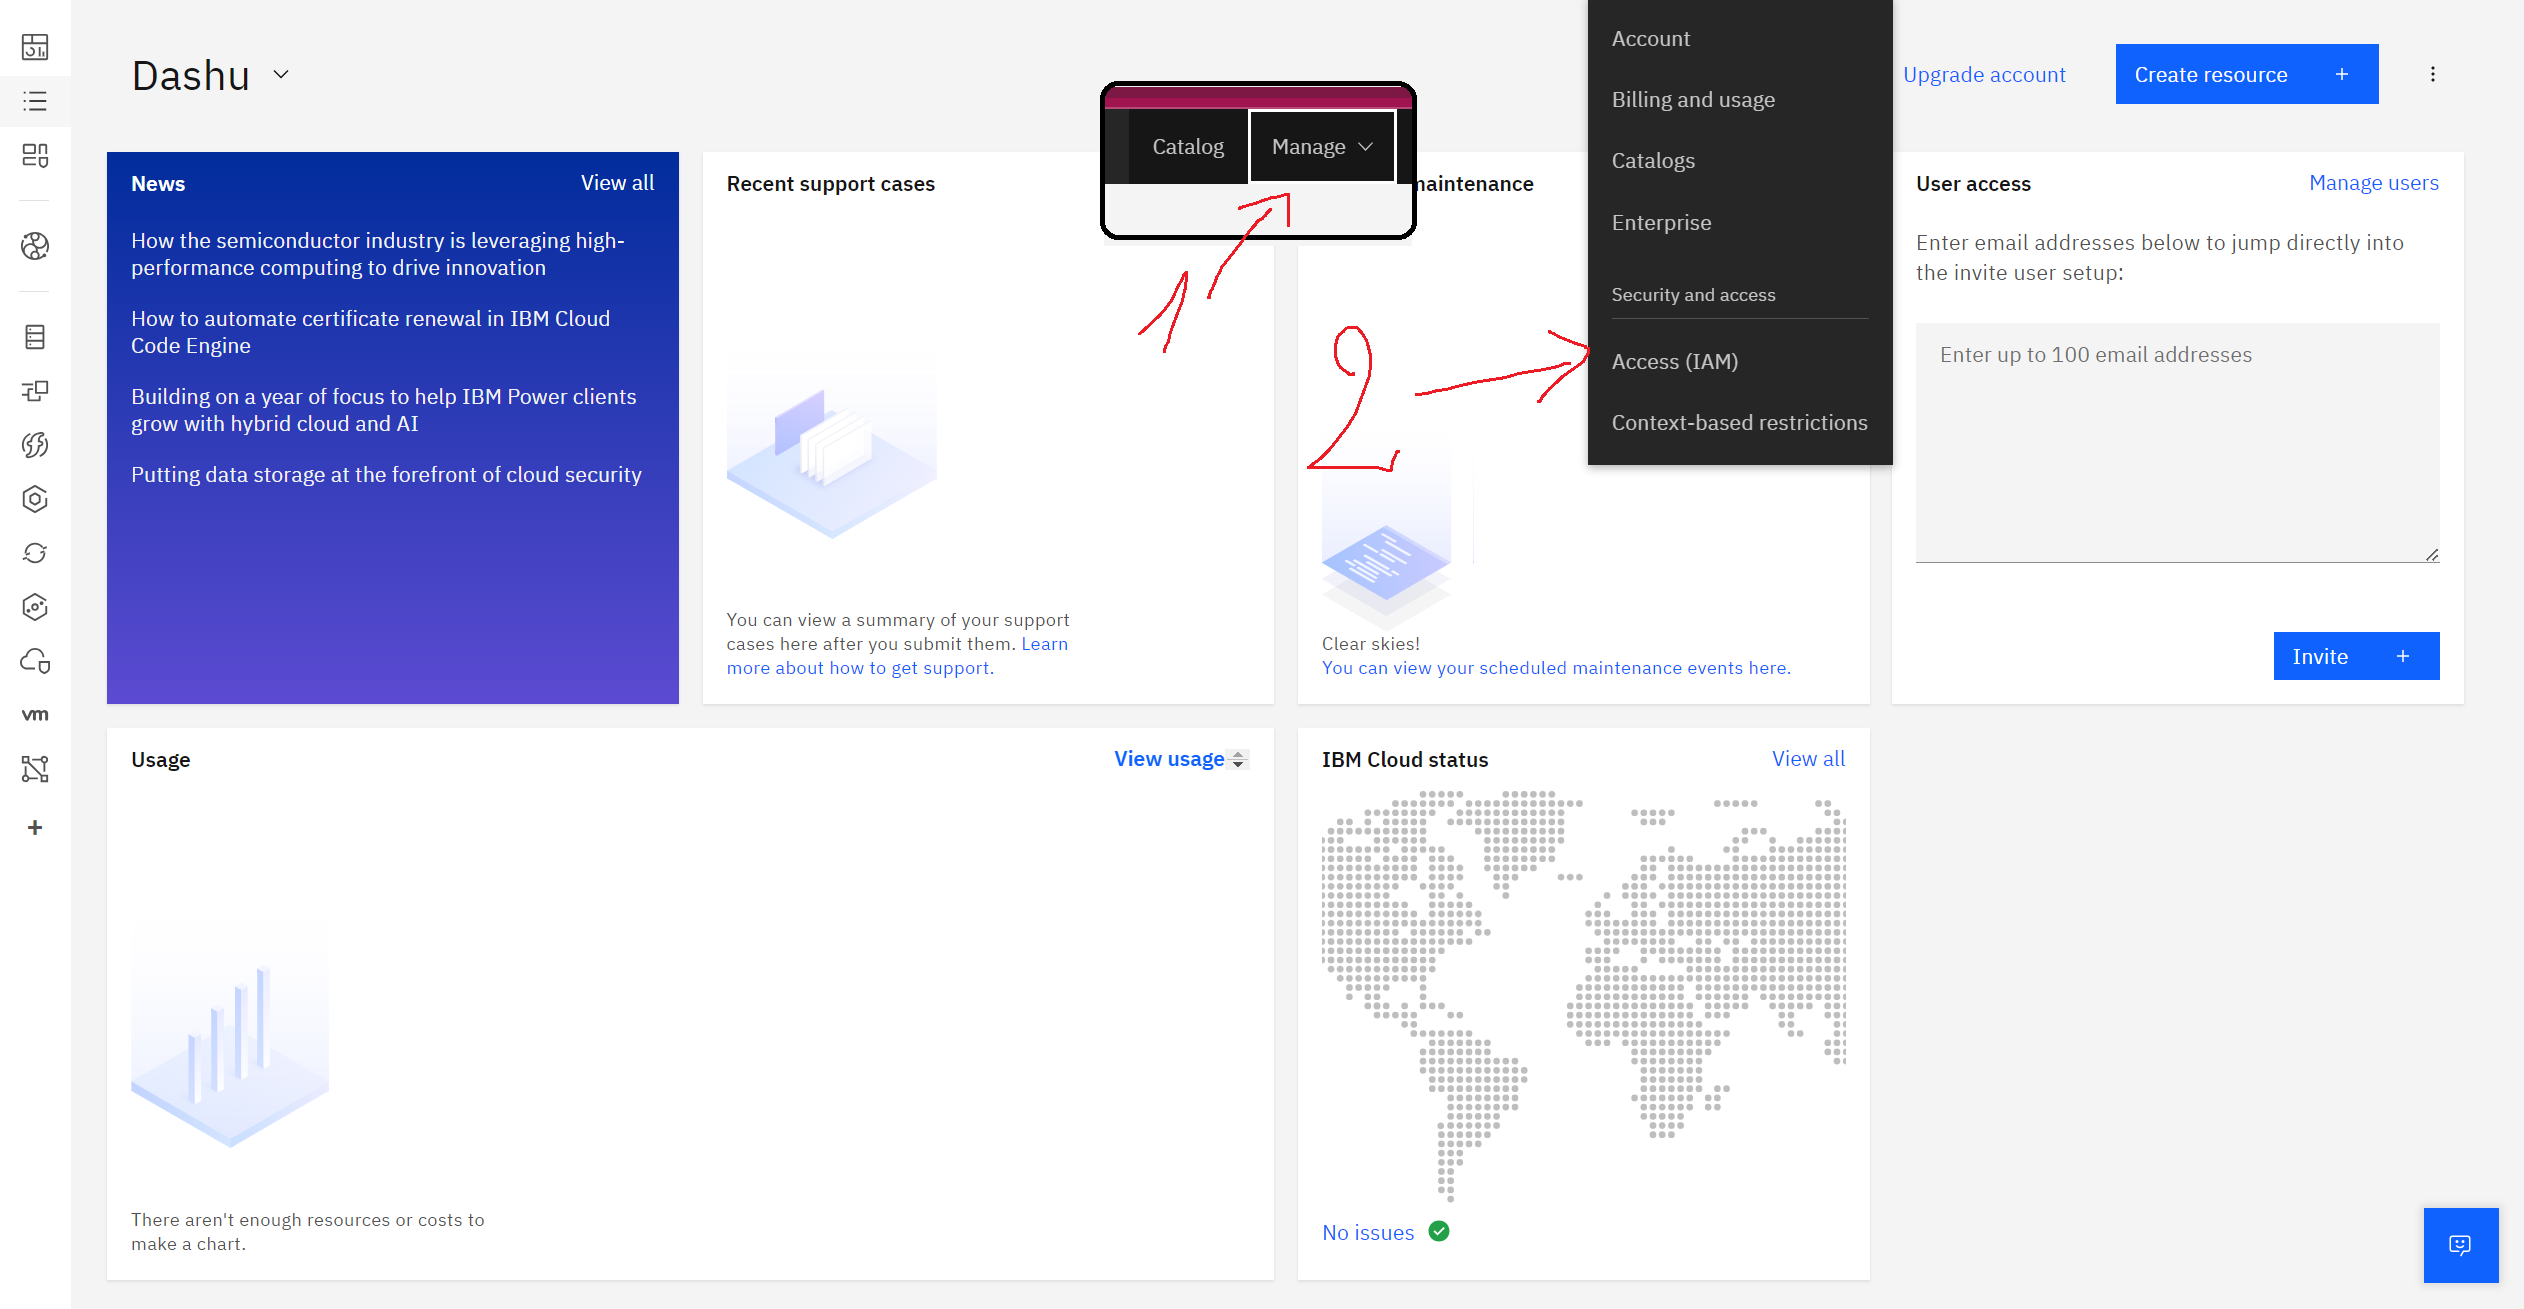
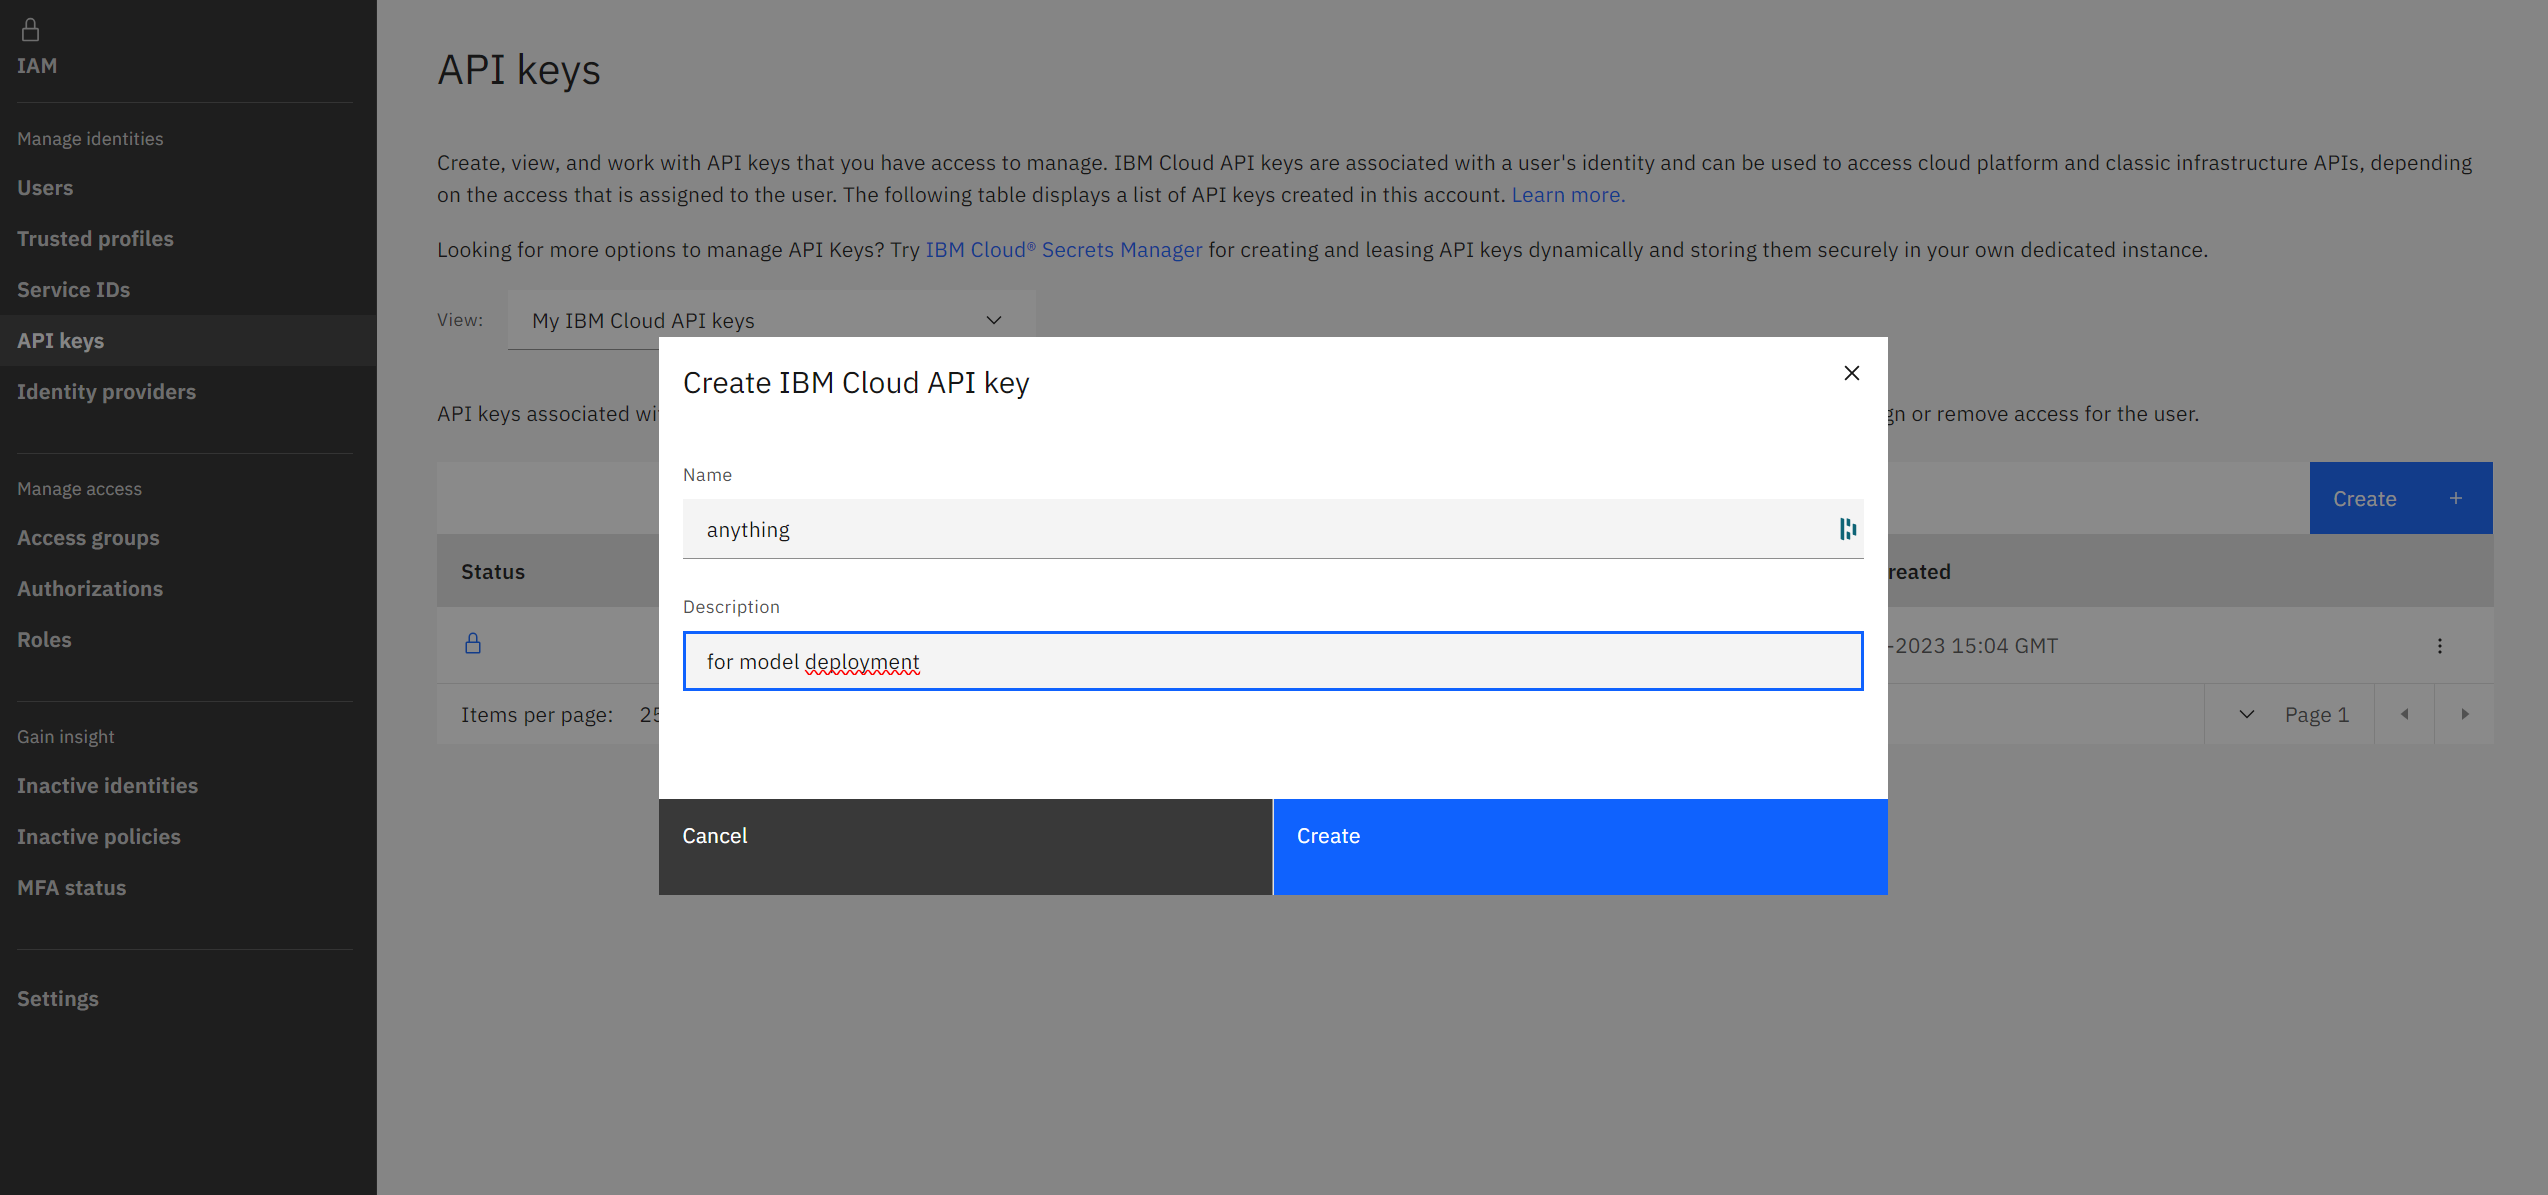
copy the apikey you get generated then, heres the list of urls:

URLS :
- Dallas: https://us-south.ml.cloud.ibm.com
- London: https://eu-gb.ml.cloud.ibm.com
- Frankfurt: https://eu-de.ml.cloud.ibm.com
- Tokyo: https://jp-tok.ml.cloud.ibm.com


In [4]:
# change the name according to the WML space name you want to use #

space_name = "Model_deploy"

space_guid = list[list['NAME']==space_name]['ID'][0]
# you can also get the guid from IBM UI, in deployement space => detils of the created dep. space #
wml_client.set.default_space(space_guid)

'SUCCESS'

In [6]:
import tensorflow as tf 
from keras.models import Model, load_model

model_name = 'jellyfish_classifier'
# dont forget to tar.gz the "model" file (zip also works) #
model_path = 'model_CNN.tar.gz'

In [7]:
import pandas as pd
# You can also use retired state i beleive ['STATE']=='retired' 👀
pd.DataFrame(wml_client.software_specifications.list(limit=100)['NAME'][wml_client.software_specifications.list(limit=100)['STATE']=='supported'])

-----------------------------  ------------------------------------  ----  ------------  --------------------------
NAME                           ID                                    TYPE  STATE         REPLACEMENT
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base  retired       runtime-22.2-py3.10
autoai-ts_rt23.1-py3.10        01ce9391-1a79-5a33-94fb-2e134337f314  base  supported
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base  retired
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base  retired
tensorflow_rt23.1-py3.10       079a91e0-245f-5269-8926-3c20b28f37dc  base  supported
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base  retired       runtime-22.2-py3.10
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base  retired
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base  retired       pytorch-onnx_rt22.2-py3.10
ai-function_0.1-py3.6         

,NAME
1,autoai-ts_rt23.1-py3.10
4,tensorflow_rt23.1-py3.10
13,autoai-kb_rt22.2-py3.10
19,pytorch-onnx_rt23.1-py3.10
34,runtime-23.1-py3.10
37,autoai-ts_rt22.2-py3.10
40,pytorch-onnx_rt22.2-py3.10
72,do_12.10
81,runtime-23.1-r4.2
91,autoai-kb_rt23.1-py3.10


In [8]:
# Set runtime Version (Pick the suitable one from the list above) #
software_spec_uid = wml_client.software_specifications.get_id_by_name('tensorflow_rt23.1-py3.10') # HERE <=== from above | #

# Setup model meta #
model_props = {
    wml_client.repository.ModelMetaNames.NAME: model_name,
    # Nn package used _ version #
    wml_client.repository.ModelMetaNames.TYPE: 'tensorflow_2.12',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

#Save model
model_details = wml_client.repository.store_model(
    model=model_path, 
    meta_props=model_props,
)

'''DONE if no error is shown'''

'DONE if no error is shown'